In [1]:
import geopandas as gpd
import libpysal as lps
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def saveImage(ax, title, filename):
    ax.set_title(title, fontdict={"fontsize": "18", "fontweight" : "3"})
    ax.get_figure().savefig(f'../images/{filename}.png', dpi=150, bbox_inches='tight')
    return ax

In [3]:
statistical_areas = gpd.read_file('../dataset/statistical_areas.geojson')

('WARNING: ', 33, ' is an island (no neighbors)')
('WARNING: ', 57, ' is an island (no neighbors)')
('WARNING: ', 75, ' is an island (no neighbors)')


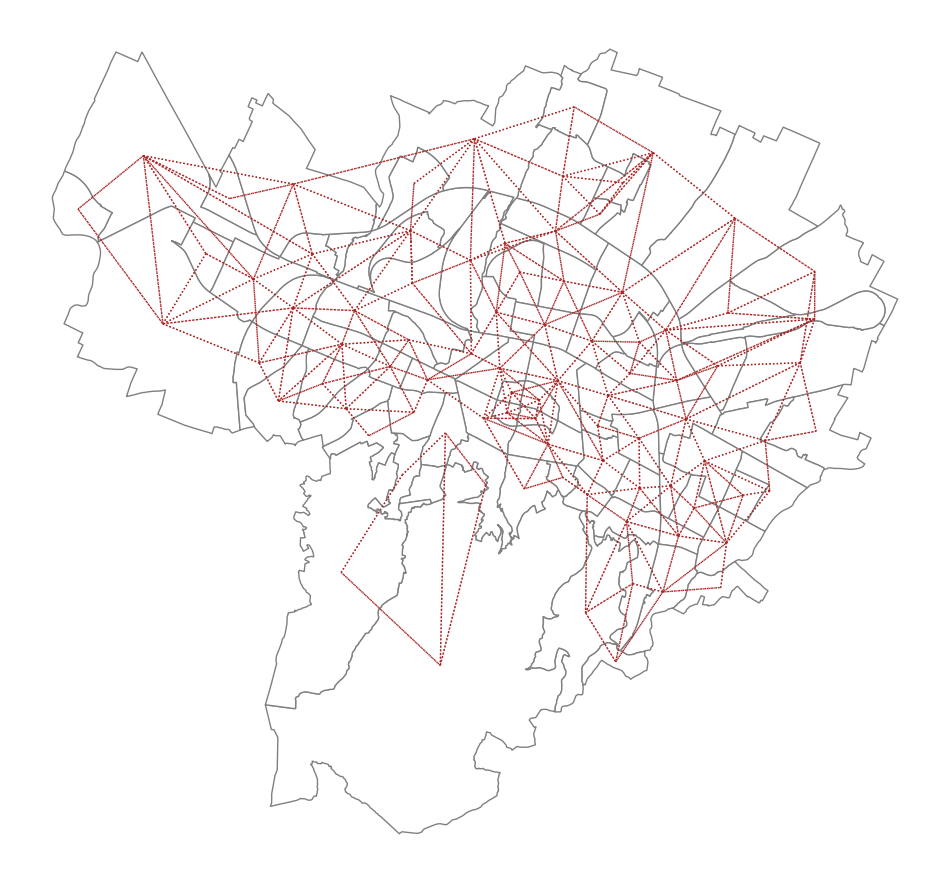

In [4]:
w_queen = lps.weights.Queen.from_dataframe(statistical_areas)
w_queen.transform = 'R'

ax = statistical_areas.plot(edgecolor='grey', facecolor='w', figsize=(12,12))
f,ax = w_queen.plot(statistical_areas, ax=ax,
        edge_kws=dict(color='#AB2525', linestyle=":", linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()
ax = saveImage(ax, '', 'queen_contiguity')
plt.show()

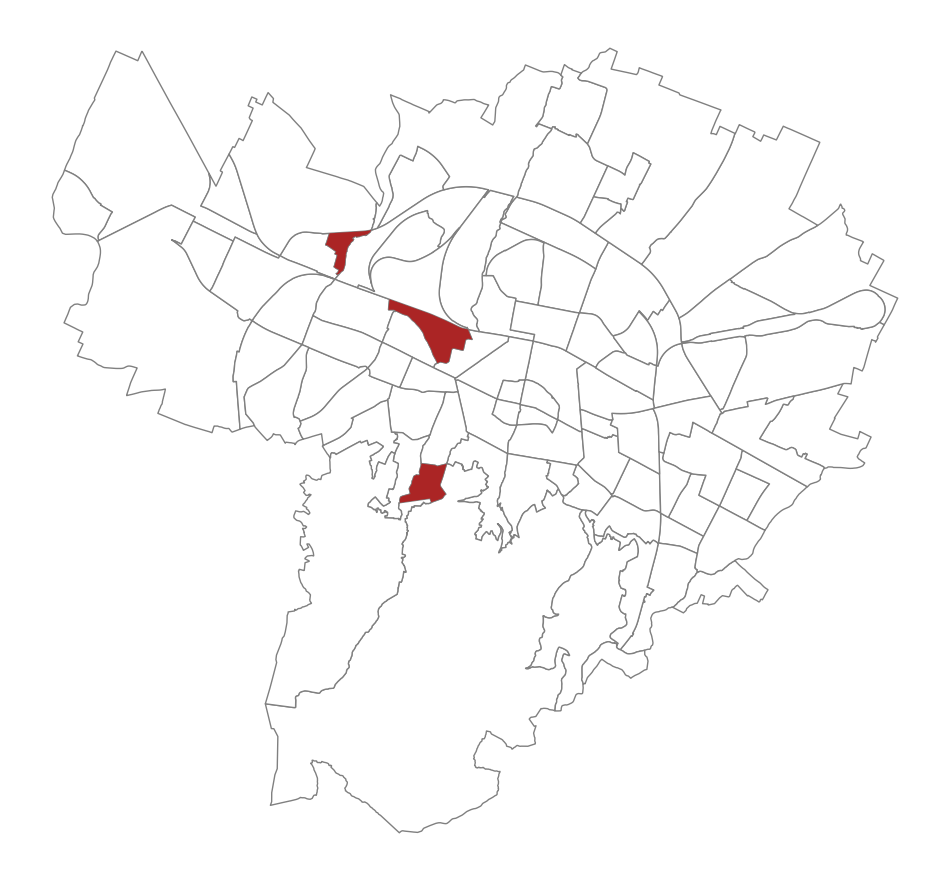

In [5]:
ax = statistical_areas.plot(edgecolor='grey', facecolor='w', figsize=(12,12))
statistical_areas[statistical_areas.index == 33].plot(ax=ax, color='#AB2525')
statistical_areas[statistical_areas.index == 57].plot(ax=ax, color='#AB2525')
statistical_areas[statistical_areas.index == 75].plot(ax=ax, color='#AB2525')
ax.set_axis_off()
ax = saveImage(ax, '', 'islands')
plt.show()

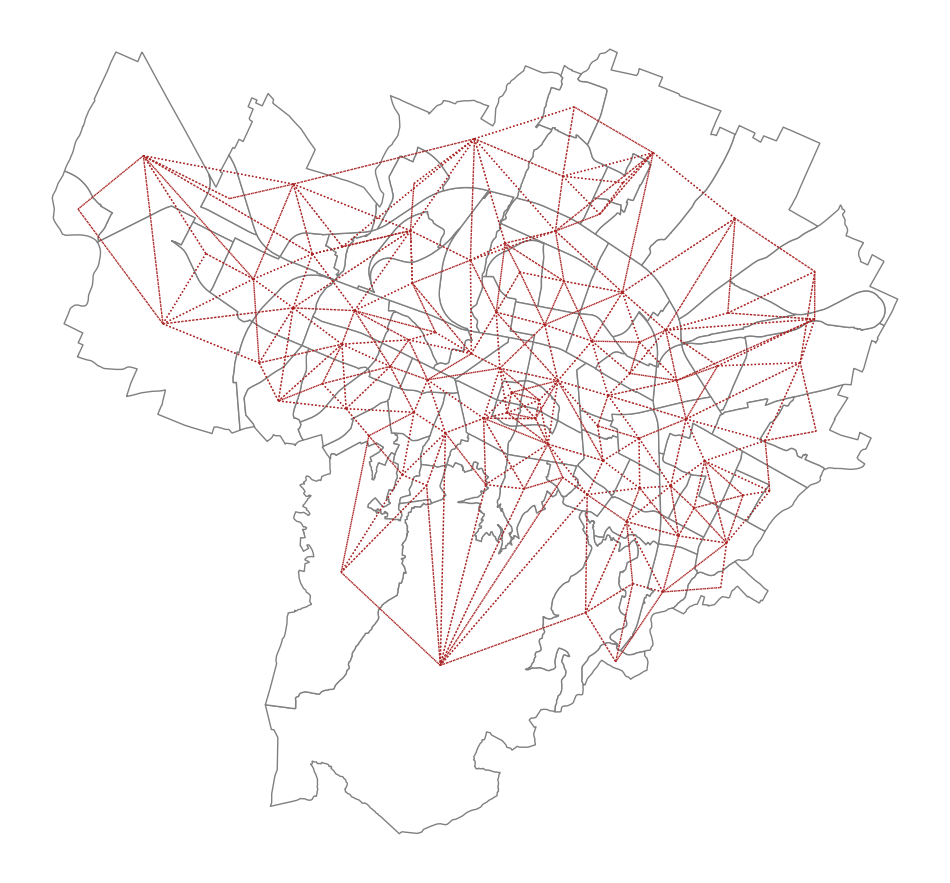

In [53]:
wf = lps.weights.fuzzy_contiguity(statistical_areas)
wf.transform = 'R'
ax = statistical_areas.plot(edgecolor='grey', facecolor='w', figsize=(12,12))
f,ax = wf.plot(statistical_areas, ax=ax, 
        edge_kws=dict(color='#AB2525', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()
ax = saveImage(ax, '', 'fuzzy_contiguity')
plt.show()